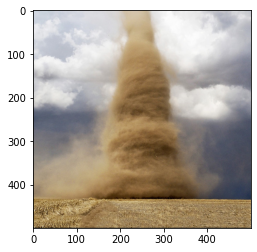

In [2]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

def checkByte(a):
    if a > 255:
        a = 255
    if a < 0:
        a = 0
    return a

def conv(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum

def median(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[ceil(len(c)/2)]

def max(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[-1]

def min(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[0]

img = Image.open('photo/vihr.jpg')
pixels = img.load()

plt.imshow(img)

-2
-5
2
-1
-1


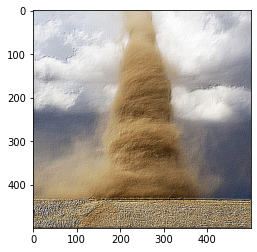

In [5]:
imgFinal = img.copy()
pixels2 = imgFinal.load()
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]

div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1
    
for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)
            
        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))
        
        pixels2[i, j] = (r, g, b)
        
plt.imshow(imgFinal)

5